In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!pip install -q keras

In [4]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import shutil
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [0]:
def vanilia_cnn(input_shape: tuple, classes: int):
    """Implement vanilla ConvNet model."""
    model = models.Sequential()
    model.add(
        layers.Conv2D(32, (3, 3), activation='relu',
                      padding='same',
                      input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))

    model.compile(
        optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [6]:
input_shape = (125, 125, 3)
classes = 10



train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  # This is the target directory
  './drive/data/FacePlace/AsianSample/train',
  target_size=(125, 125),
  batch_size=32,
  # Since we use binary_crossentropy loss, we need binary labels
  class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
  './drive/data/FacePlace/AsianSample/val',
  target_size=(125, 125),
  batch_size=32,
  class_mode='categorical')

model = vanilia_cnn(input_shape=input_shape, classes=classes)

history = model.fit_generator(
  train_generator,
  steps_per_epoch=50,
  epochs=300,
  validation_data=validation_generator,
  validation_steps=50)

Found 236 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Epoch 1/300
50/50 [==============================] - 191s 4s/step - loss: 2.2979 - acc: 0.1328 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 2/300
50/50 [==============================] - 25s 499ms/step - loss: 2.2879 - acc: 0.1421 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 3/300
50/50 [==============================] - 26s 512ms/step - loss: 2.2880 - acc: 0.1452 - val_loss: 2.3012 - val_acc: 0.2000
Epoch 4/300
50/50 [==============================] - 26s 522ms/step - loss: 2.2851 - acc: 0.1467 - val_loss: 2.2998 - val_acc: 0.2000
Epoch 5/300
34/50 [===================>..........] - ETA: 4s - loss: 2.2832 - acc: 0.1556

50/50 [==============================] - 25s 499ms/step - loss: 2.2817 - acc: 0.1559 - val_loss: 2.2962 - val_acc: 0.2000
Epoch 6/300
50/50 [==============================] - 26s 524ms/step - loss: 2.2781 - acc: 0.1615 - val_loss: 2.2934 - val_acc: 0.2000
Epoch 7/300
50/50 [==============================] - 25s 502ms/step - loss: 2.2752 - acc: 0.1644 - val_loss: 2.2884 - val_acc: 0.1667
Epoch 8/300
50/50 [==============================] - 27s 531ms/step - loss: 2.2611 - acc: 0.1728 - val_loss: 2.2757 - val_acc: 0.2000
Epoch 9/300
50/50 [==============================] - 25s 502ms/step - loss: 2.2477 - acc: 0.1860 - val_loss: 2.2535 - val_acc: 0.2333
Epoch 10/300
20/50 [===========>..................] - ETA: 7s - loss: 2.2565 - acc: 0.1604

50/50 [==============================] - 25s 510ms/step - loss: 2.2493 - acc: 0.1885 - val_loss: 2.2626 - val_acc: 0.2000
Epoch 11/300
50/50 [==============================] - 25s 501ms/step - loss: 2.2258 - acc: 0.1923 - val_loss: 2.2472 - val_acc: 0.2000
Epoch 12/300
50/50 [==============================] - 26s 523ms/step - loss: 2.2176 - acc: 0.1921 - val_loss: 2.2474 - val_acc: 0.1333
Epoch 13/300
50/50 [==============================] - 26s 515ms/step - loss: 2.1971 - acc: 0.1973 - val_loss: 2.1954 - val_acc: 0.2333
Epoch 14/300
50/50 [==============================] - 25s 503ms/step - loss: 2.1932 - acc: 0.2075 - val_loss: 2.1274 - val_acc: 0.3333
Epoch 15/300
18/50 [=========>....................] - ETA: 8s - loss: 2.1929 - acc: 0.1852

50/50 [==============================] - 25s 506ms/step - loss: 2.1719 - acc: 0.1982 - val_loss: 2.2533 - val_acc: 0.1333
Epoch 16/300
50/50 [==============================] - 26s 521ms/step - loss: 2.1439 - acc: 0.2235 - val_loss: 2.0792 - val_acc: 0.3667
Epoch 17/300
50/50 [==============================] - 26s 514ms/step - loss: 2.1335 - acc: 0.2130 - val_loss: 2.1636 - val_acc: 0.2667
Epoch 18/300
50/50 [==============================] - 25s 494ms/step - loss: 2.1376 - acc: 0.2181 - val_loss: 2.2692 - val_acc: 0.1667
Epoch 19/300
50/50 [==============================] - 25s 501ms/step - loss: 2.1143 - acc: 0.2035 - val_loss: 2.0949 - val_acc: 0.3333
Epoch 20/300
17/50 [=========>....................] - ETA: 9s - loss: 2.0962 - acc: 0.2279

50/50 [==============================] - 27s 533ms/step - loss: 2.0845 - acc: 0.2325 - val_loss: 2.0655 - val_acc: 0.2667
Epoch 21/300
50/50 [==============================] - 25s 502ms/step - loss: 2.0624 - acc: 0.2499 - val_loss: 2.2694 - val_acc: 0.1667
Epoch 22/300
50/50 [==============================] - 26s 515ms/step - loss: 2.0514 - acc: 0.2417 - val_loss: 2.0530 - val_acc: 0.3000
Epoch 23/300
50/50 [==============================] - 25s 502ms/step - loss: 2.0279 - acc: 0.2428 - val_loss: 1.9867 - val_acc: 0.3000
Epoch 24/300
50/50 [==============================] - 26s 528ms/step - loss: 2.0006 - acc: 0.2635 - val_loss: 1.9200 - val_acc: 0.3667
Epoch 25/300
17/50 [=========>....................] - ETA: 8s - loss: 1.9984 - acc: 0.2623

50/50 [==============================] - 25s 500ms/step - loss: 2.0090 - acc: 0.2562 - val_loss: 1.9171 - val_acc: 0.3667
Epoch 26/300
50/50 [==============================] - 25s 496ms/step - loss: 2.0092 - acc: 0.2501 - val_loss: 2.1472 - val_acc: 0.2000
Epoch 27/300
50/50 [==============================] - 26s 511ms/step - loss: 1.9383 - acc: 0.2731 - val_loss: 1.8865 - val_acc: 0.3333
Epoch 28/300
50/50 [==============================] - 26s 516ms/step - loss: 1.9824 - acc: 0.2666 - val_loss: 2.3414 - val_acc: 0.1333
Epoch 29/300
50/50 [==============================] - 25s 508ms/step - loss: 1.9532 - acc: 0.2787 - val_loss: 1.7425 - val_acc: 0.4667
Epoch 30/300
17/50 [=========>....................] - ETA: 8s - loss: 1.8824 - acc: 0.3100

50/50 [==============================] - 25s 497ms/step - loss: 1.8883 - acc: 0.2991 - val_loss: 1.8199 - val_acc: 0.4000
Epoch 31/300
50/50 [==============================] - 25s 502ms/step - loss: 1.8730 - acc: 0.3210 - val_loss: 1.7763 - val_acc: 0.4333
Epoch 32/300
50/50 [==============================] - 27s 531ms/step - loss: 1.8985 - acc: 0.2964 - val_loss: 1.7758 - val_acc: 0.3667
Epoch 33/300
50/50 [==============================] - 25s 496ms/step - loss: 2.0321 - acc: 0.2577 - val_loss: 1.8475 - val_acc: 0.4000
Epoch 34/300
50/50 [==============================] - 26s 512ms/step - loss: 1.8770 - acc: 0.3021 - val_loss: 1.7257 - val_acc: 0.5000
Epoch 35/300
17/50 [=========>....................] - ETA: 9s - loss: 1.8766 - acc: 0.2935

50/50 [==============================] - 25s 502ms/step - loss: 1.8572 - acc: 0.2984 - val_loss: 1.9455 - val_acc: 0.3333
Epoch 36/300
50/50 [==============================] - 27s 532ms/step - loss: 1.8939 - acc: 0.2963 - val_loss: 1.8733 - val_acc: 0.3333
Epoch 37/300
50/50 [==============================] - 25s 499ms/step - loss: 1.8134 - acc: 0.3281 - val_loss: 1.8058 - val_acc: 0.3333
Epoch 38/300
50/50 [==============================] - 25s 496ms/step - loss: 1.7992 - acc: 0.3168 - val_loss: 1.6665 - val_acc: 0.3667
Epoch 39/300
50/50 [==============================] - 26s 510ms/step - loss: 1.8438 - acc: 0.3084 - val_loss: 1.6922 - val_acc: 0.5333
Epoch 40/300
17/50 [=========>....................] - ETA: 9s - loss: 1.7726 - acc: 0.3186

50/50 [==============================] - 26s 518ms/step - loss: 1.7786 - acc: 0.3439 - val_loss: 1.6409 - val_acc: 0.4667
Epoch 41/300
50/50 [==============================] - 26s 512ms/step - loss: 1.7694 - acc: 0.3422 - val_loss: 1.7127 - val_acc: 0.4000
Epoch 42/300
50/50 [==============================] - 25s 499ms/step - loss: 1.7168 - acc: 0.3583 - val_loss: 1.6273 - val_acc: 0.4000
Epoch 43/300
50/50 [==============================] - 26s 512ms/step - loss: 1.7606 - acc: 0.3421 - val_loss: 1.5707 - val_acc: 0.5333
Epoch 44/300
50/50 [==============================] - 26s 516ms/step - loss: 1.6985 - acc: 0.3828 - val_loss: 1.7033 - val_acc: 0.3667
Epoch 45/300
17/50 [=========>....................] - ETA: 8s - loss: 1.6721 - acc: 0.3713

50/50 [==============================] - 25s 496ms/step - loss: 1.7373 - acc: 0.3635 - val_loss: 1.7682 - val_acc: 0.4000
Epoch 46/300
50/50 [==============================] - 26s 515ms/step - loss: 1.7238 - acc: 0.3539 - val_loss: 1.6483 - val_acc: 0.4667
Epoch 47/300
50/50 [==============================] - 25s 500ms/step - loss: 1.6993 - acc: 0.3579 - val_loss: 1.5572 - val_acc: 0.5333
Epoch 48/300
50/50 [==============================] - 27s 531ms/step - loss: 1.6450 - acc: 0.3717 - val_loss: 1.5163 - val_acc: 0.4667
Epoch 49/300
50/50 [==============================] - 25s 497ms/step - loss: 1.6324 - acc: 0.3944 - val_loss: 1.5339 - val_acc: 0.4333
Epoch 50/300
18/50 [=========>....................] - ETA: 8s - loss: 1.6990 - acc: 0.3652

50/50 [==============================] - 25s 501ms/step - loss: 1.6365 - acc: 0.3954 - val_loss: 1.5424 - val_acc: 0.4667
Epoch 51/300
50/50 [==============================] - 25s 508ms/step - loss: 1.6708 - acc: 0.3473 - val_loss: 1.5081 - val_acc: 0.5000
Epoch 52/300
50/50 [==============================] - 26s 518ms/step - loss: 1.6535 - acc: 0.3938 - val_loss: 1.5813 - val_acc: 0.4667
Epoch 53/300
50/50 [==============================] - 26s 515ms/step - loss: 1.5954 - acc: 0.3917 - val_loss: 1.6551 - val_acc: 0.4000
Epoch 54/300
50/50 [==============================] - 25s 502ms/step - loss: 1.5884 - acc: 0.3954 - val_loss: 1.4554 - val_acc: 0.5333
Epoch 55/300
18/50 [=========>....................] - ETA: 8s - loss: 1.5906 - acc: 0.3958

50/50 [==============================] - 26s 512ms/step - loss: 1.5886 - acc: 0.3957 - val_loss: 1.4834 - val_acc: 0.4667
Epoch 56/300
50/50 [==============================] - 26s 517ms/step - loss: 1.5551 - acc: 0.4109 - val_loss: 1.3977 - val_acc: 0.4667
Epoch 57/300
50/50 [==============================] - 25s 500ms/step - loss: 1.5353 - acc: 0.4065 - val_loss: 1.4421 - val_acc: 0.4000
Epoch 58/300
50/50 [==============================] - 26s 511ms/step - loss: 1.5650 - acc: 0.4247 - val_loss: 1.5885 - val_acc: 0.4000
Epoch 59/300
50/50 [==============================] - 25s 499ms/step - loss: 1.5403 - acc: 0.4201 - val_loss: 1.7580 - val_acc: 0.4000
Epoch 60/300
18/50 [=========>....................] - ETA: 9s - loss: 1.5786 - acc: 0.3750

50/50 [==============================] - 27s 532ms/step - loss: 1.5276 - acc: 0.4080 - val_loss: 1.5159 - val_acc: 0.5000
Epoch 61/300
50/50 [==============================] - 25s 498ms/step - loss: 1.5782 - acc: 0.4039 - val_loss: 1.3143 - val_acc: 0.5667
Epoch 62/300
50/50 [==============================] - 26s 510ms/step - loss: 1.4676 - acc: 0.4259 - val_loss: 1.5615 - val_acc: 0.4667
Epoch 63/300
50/50 [==============================] - 25s 499ms/step - loss: 1.4642 - acc: 0.4284 - val_loss: 1.3374 - val_acc: 0.5333
Epoch 64/300
50/50 [==============================] - 26s 519ms/step - loss: 1.4853 - acc: 0.4449 - val_loss: 1.4218 - val_acc: 0.4667
Epoch 65/300
17/50 [=========>....................] - ETA: 8s - loss: 1.4666 - acc: 0.4400

50/50 [==============================] - 25s 508ms/step - loss: 1.4911 - acc: 0.4520 - val_loss: 1.2382 - val_acc: 0.5667
Epoch 66/300
50/50 [==============================] - 25s 504ms/step - loss: 1.4085 - acc: 0.4653 - val_loss: 1.5448 - val_acc: 0.4667
Epoch 67/300
50/50 [==============================] - 26s 515ms/step - loss: 1.4703 - acc: 0.4469 - val_loss: 1.4027 - val_acc: 0.5333
Epoch 68/300
50/50 [==============================] - 26s 523ms/step - loss: 1.4006 - acc: 0.4727 - val_loss: 1.6531 - val_acc: 0.4000
Epoch 69/300
50/50 [==============================] - 25s 508ms/step - loss: 1.4302 - acc: 0.4403 - val_loss: 1.1598 - val_acc: 0.6000
Epoch 70/300
18/50 [=========>....................] - ETA: 8s - loss: 1.4226 - acc: 0.4421

50/50 [==============================] - 25s 497ms/step - loss: 1.3783 - acc: 0.4777 - val_loss: 1.3747 - val_acc: 0.3667
Epoch 71/300
50/50 [==============================] - 25s 504ms/step - loss: 1.3859 - acc: 0.4712 - val_loss: 1.4738 - val_acc: 0.4333
Epoch 72/300
50/50 [==============================] - 26s 528ms/step - loss: 1.4359 - acc: 0.4638 - val_loss: 1.1836 - val_acc: 0.5667
Epoch 73/300
50/50 [==============================] - 25s 502ms/step - loss: 1.3550 - acc: 0.5015 - val_loss: 1.0585 - val_acc: 0.6000
Epoch 74/300
50/50 [==============================] - 26s 528ms/step - loss: 1.2741 - acc: 0.5128 - val_loss: 1.0324 - val_acc: 0.6000
Epoch 75/300
17/50 [=========>....................] - ETA: 9s - loss: 1.3441 - acc: 0.4724

50/50 [==============================] - 25s 503ms/step - loss: 1.3232 - acc: 0.4798 - val_loss: 1.5833 - val_acc: 0.4333
Epoch 76/300
50/50 [==============================] - 26s 520ms/step - loss: 1.2874 - acc: 0.5127 - val_loss: 1.3792 - val_acc: 0.5333
Epoch 77/300
50/50 [==============================] - 26s 514ms/step - loss: 1.2753 - acc: 0.5084 - val_loss: 1.0397 - val_acc: 0.7333
Epoch 78/300
50/50 [==============================] - 25s 496ms/step - loss: 1.2926 - acc: 0.5110 - val_loss: 1.3608 - val_acc: 0.5333
Epoch 79/300
50/50 [==============================] - 26s 511ms/step - loss: 1.2859 - acc: 0.5272 - val_loss: 1.0796 - val_acc: 0.7000
Epoch 80/300
17/50 [=========>....................] - ETA: 9s - loss: 1.1856 - acc: 0.5625

50/50 [==============================] - 26s 519ms/step - loss: 1.2628 - acc: 0.5344 - val_loss: 1.0304 - val_acc: 0.6333
Epoch 81/300
50/50 [==============================] - 26s 512ms/step - loss: 1.2433 - acc: 0.5375 - val_loss: 0.9631 - val_acc: 0.6667
Epoch 82/300
50/50 [==============================] - 25s 500ms/step - loss: 1.2484 - acc: 0.5313 - val_loss: 0.8922 - val_acc: 0.6333
Epoch 83/300
50/50 [==============================] - 25s 502ms/step - loss: 1.1786 - acc: 0.5584 - val_loss: 1.0151 - val_acc: 0.7000
Epoch 84/300
50/50 [==============================] - 26s 528ms/step - loss: 1.1778 - acc: 0.5564 - val_loss: 1.0654 - val_acc: 0.6333
Epoch 85/300
17/50 [=========>....................] - ETA: 8s - loss: 1.1677 - acc: 0.5521

50/50 [==============================] - 25s 500ms/step - loss: 1.1570 - acc: 0.5723 - val_loss: 1.0440 - val_acc: 0.6000
Epoch 86/300
50/50 [==============================] - 27s 530ms/step - loss: 1.1399 - acc: 0.5592 - val_loss: 0.9154 - val_acc: 0.7000
Epoch 87/300
50/50 [==============================] - 25s 499ms/step - loss: 1.1217 - acc: 0.5764 - val_loss: 0.9516 - val_acc: 0.6000
Epoch 88/300
50/50 [==============================] - 26s 529ms/step - loss: 1.3025 - acc: 0.5318 - val_loss: 0.8806 - val_acc: 0.7000
Epoch 89/300
50/50 [==============================] - 25s 498ms/step - loss: 1.1559 - acc: 0.5831 - val_loss: 1.0321 - val_acc: 0.6333
Epoch 90/300
17/50 [=========>....................] - ETA: 8s - loss: 1.0100 - acc: 0.6140

50/50 [==============================] - 25s 496ms/step - loss: 1.0975 - acc: 0.5891 - val_loss: 0.8705 - val_acc: 0.7333
Epoch 91/300
50/50 [==============================] - 26s 515ms/step - loss: 1.1341 - acc: 0.5842 - val_loss: 1.0722 - val_acc: 0.6333
Epoch 92/300
50/50 [==============================] - 26s 519ms/step - loss: 1.1275 - acc: 0.5811 - val_loss: 0.8920 - val_acc: 0.6333
Epoch 93/300
50/50 [==============================] - 26s 511ms/step - loss: 1.0166 - acc: 0.6352 - val_loss: 0.8931 - val_acc: 0.7000
Epoch 94/300
50/50 [==============================] - 25s 490ms/step - loss: 1.0566 - acc: 0.6003 - val_loss: 0.8763 - val_acc: 0.6667
Epoch 95/300
18/50 [=========>....................] - ETA: 8s - loss: 1.1976 - acc: 0.5619

50/50 [==============================] - 25s 497ms/step - loss: 1.0827 - acc: 0.5922 - val_loss: 0.8192 - val_acc: 0.8333
Epoch 96/300
50/50 [==============================] - 26s 527ms/step - loss: 1.0090 - acc: 0.6289 - val_loss: 0.8268 - val_acc: 0.7667
Epoch 97/300
50/50 [==============================] - 25s 495ms/step - loss: 1.0505 - acc: 0.6115 - val_loss: 0.7802 - val_acc: 0.7333
Epoch 98/300
50/50 [==============================] - 25s 508ms/step - loss: 1.0530 - acc: 0.6294 - val_loss: 0.7641 - val_acc: 0.7667
Epoch 99/300
50/50 [==============================] - 25s 500ms/step - loss: 1.0107 - acc: 0.6260 - val_loss: 0.8216 - val_acc: 0.7333
Epoch 100/300
17/50 [=========>....................] - ETA: 9s - loss: 1.0461 - acc: 0.6127

50/50 [==============================] - 26s 527ms/step - loss: 1.0002 - acc: 0.6224 - val_loss: 0.6683 - val_acc: 0.8000
Epoch 101/300
50/50 [==============================] - 25s 500ms/step - loss: 0.9833 - acc: 0.6364 - val_loss: 0.7227 - val_acc: 0.8000
Epoch 102/300
50/50 [==============================] - 25s 493ms/step - loss: 0.9350 - acc: 0.6592 - val_loss: 0.6677 - val_acc: 0.8333
Epoch 103/300
50/50 [==============================] - 26s 513ms/step - loss: 0.9323 - acc: 0.6681 - val_loss: 0.6643 - val_acc: 0.8000
Epoch 104/300
50/50 [==============================] - 26s 515ms/step - loss: 0.9370 - acc: 0.6540 - val_loss: 0.5928 - val_acc: 0.8333
Epoch 105/300
15/50 [========>.....................] - ETA: 8s - loss: 0.9986 - acc: 0.6375

50/50 [==============================] - 26s 514ms/step - loss: 0.9993 - acc: 0.6267 - val_loss: 1.0198 - val_acc: 0.7333
Epoch 106/300
50/50 [==============================] - 25s 498ms/step - loss: 0.9835 - acc: 0.6493 - val_loss: 0.7506 - val_acc: 0.8000
Epoch 107/300
50/50 [==============================] - 26s 510ms/step - loss: 0.9326 - acc: 0.6527 - val_loss: 0.9331 - val_acc: 0.6333
Epoch 108/300
50/50 [==============================] - 26s 522ms/step - loss: 0.8734 - acc: 0.6830 - val_loss: 0.8418 - val_acc: 0.7333
Epoch 109/300
50/50 [==============================] - 25s 499ms/step - loss: 1.0107 - acc: 0.6562 - val_loss: 0.8370 - val_acc: 0.7000
Epoch 110/300
16/50 [========>.....................] - ETA: 8s - loss: 0.8940 - acc: 0.6706

50/50 [==============================] - 25s 509ms/step - loss: 0.9334 - acc: 0.6455 - val_loss: 0.7828 - val_acc: 0.7333
Epoch 111/300
50/50 [==============================] - 25s 502ms/step - loss: 0.8772 - acc: 0.6765 - val_loss: 0.7706 - val_acc: 0.8000
Epoch 112/300
50/50 [==============================] - 27s 536ms/step - loss: 0.8557 - acc: 0.6816 - val_loss: 0.6945 - val_acc: 0.8333
Epoch 113/300
50/50 [==============================] - 25s 499ms/step - loss: 0.8292 - acc: 0.6920 - val_loss: 0.6161 - val_acc: 0.7667
Epoch 114/300
50/50 [==============================] - 25s 509ms/step - loss: 0.8115 - acc: 0.6946 - val_loss: 0.8833 - val_acc: 0.6333
Epoch 115/300
16/50 [========>.....................] - ETA: 9s - loss: 0.9676 - acc: 0.6569

50/50 [==============================] - 25s 502ms/step - loss: 0.8755 - acc: 0.6819 - val_loss: 0.6567 - val_acc: 0.8333
Epoch 116/300
50/50 [==============================] - 26s 519ms/step - loss: 0.8478 - acc: 0.6762 - val_loss: 0.5204 - val_acc: 0.8333
Epoch 117/300
50/50 [==============================] - 25s 508ms/step - loss: 0.8237 - acc: 0.6968 - val_loss: 0.5975 - val_acc: 0.7667
Epoch 118/300
50/50 [==============================] - 25s 496ms/step - loss: 0.8741 - acc: 0.6714 - val_loss: 0.6545 - val_acc: 0.8000
Epoch 119/300
50/50 [==============================] - 26s 512ms/step - loss: 0.8385 - acc: 0.7029 - val_loss: 0.8845 - val_acc: 0.6000
Epoch 120/300
16/50 [========>.....................] - ETA: 10s - loss: 0.8116 - acc: 0.7044

50/50 [==============================] - 26s 520ms/step - loss: 0.8120 - acc: 0.6962 - val_loss: 0.7177 - val_acc: 0.8667
Epoch 121/300
50/50 [==============================] - 25s 500ms/step - loss: 0.8013 - acc: 0.7033 - val_loss: 0.7264 - val_acc: 0.8000
Epoch 122/300
50/50 [==============================] - 25s 508ms/step - loss: 0.7197 - acc: 0.7232 - val_loss: 0.5852 - val_acc: 0.8000
Epoch 123/300
50/50 [==============================] - 25s 498ms/step - loss: 0.9255 - acc: 0.6889 - val_loss: 0.7957 - val_acc: 0.7333
Epoch 124/300
50/50 [==============================] - 26s 527ms/step - loss: 0.7366 - acc: 0.7282 - val_loss: 0.5924 - val_acc: 0.8000
Epoch 125/300
16/50 [========>.....................] - ETA: 8s - loss: 0.7394 - acc: 0.7233

50/50 [==============================] - 25s 501ms/step - loss: 0.7343 - acc: 0.7289 - val_loss: 0.5336 - val_acc: 0.8667
Epoch 126/300
50/50 [==============================] - 26s 511ms/step - loss: 0.7431 - acc: 0.7332 - val_loss: 0.5901 - val_acc: 0.8333
Epoch 127/300
50/50 [==============================] - 25s 505ms/step - loss: 0.7662 - acc: 0.7204 - val_loss: 0.5768 - val_acc: 0.8000
Epoch 128/300
50/50 [==============================] - 26s 517ms/step - loss: 0.7390 - acc: 0.7279 - val_loss: 0.4883 - val_acc: 0.8333
Epoch 129/300
50/50 [==============================] - 26s 518ms/step - loss: 0.7190 - acc: 0.7351 - val_loss: 0.7950 - val_acc: 0.7667
Epoch 130/300
16/50 [========>.....................] - ETA: 8s - loss: 0.7709 - acc: 0.7233

50/50 [==============================] - 25s 502ms/step - loss: 0.7376 - acc: 0.7364 - val_loss: 0.6550 - val_acc: 0.8000
Epoch 131/300
50/50 [==============================] - 26s 512ms/step - loss: 0.6827 - acc: 0.7441 - val_loss: 0.7557 - val_acc: 0.7667
Epoch 132/300
50/50 [==============================] - 26s 519ms/step - loss: 0.7357 - acc: 0.7228 - val_loss: 0.6526 - val_acc: 0.8333
Epoch 133/300
50/50 [==============================] - 26s 513ms/step - loss: 0.6992 - acc: 0.7452 - val_loss: 0.8049 - val_acc: 0.6667
Epoch 134/300
50/50 [==============================] - 25s 500ms/step - loss: 0.6503 - acc: 0.7606 - val_loss: 0.6115 - val_acc: 0.8333
Epoch 135/300
16/50 [========>.....................] - ETA: 9s - loss: 0.6252 - acc: 0.7676

50/50 [==============================] - 25s 496ms/step - loss: 0.6621 - acc: 0.7574 - val_loss: 0.7942 - val_acc: 0.8000
Epoch 136/300
50/50 [==============================] - 27s 535ms/step - loss: 0.6692 - acc: 0.7629 - val_loss: 0.4863 - val_acc: 0.8667
Epoch 137/300
50/50 [==============================] - 25s 497ms/step - loss: 0.7663 - acc: 0.7316 - val_loss: 0.7135 - val_acc: 0.8000
Epoch 138/300
50/50 [==============================] - 26s 510ms/step - loss: 0.7900 - acc: 0.7284 - val_loss: 0.6466 - val_acc: 0.7667
Epoch 139/300
50/50 [==============================] - 25s 502ms/step - loss: 0.6456 - acc: 0.7661 - val_loss: 0.4914 - val_acc: 0.8333
Epoch 140/300
16/50 [========>.....................] - ETA: 9s - loss: 0.6209 - acc: 0.7598

50/50 [==============================] - 27s 532ms/step - loss: 0.6377 - acc: 0.7560 - val_loss: 0.4426 - val_acc: 0.8333
Epoch 141/300
50/50 [==============================] - 25s 500ms/step - loss: 0.6274 - acc: 0.7769 - val_loss: 0.4279 - val_acc: 0.7667
Epoch 142/300
50/50 [==============================] - 25s 494ms/step - loss: 0.8227 - acc: 0.7078 - val_loss: 0.5897 - val_acc: 0.8000
Epoch 143/300
50/50 [==============================] - 25s 510ms/step - loss: 0.6026 - acc: 0.7800 - val_loss: 0.4665 - val_acc: 0.8667
Epoch 144/300
50/50 [==============================] - 26s 520ms/step - loss: 0.5750 - acc: 0.7906 - val_loss: 0.5180 - val_acc: 0.8000
Epoch 145/300
16/50 [========>.....................] - ETA: 8s - loss: 0.7026 - acc: 0.7441

50/50 [==============================] - 26s 512ms/step - loss: 0.5934 - acc: 0.7898 - val_loss: 0.4599 - val_acc: 0.8667
Epoch 146/300
50/50 [==============================] - 25s 497ms/step - loss: 0.5890 - acc: 0.7762 - val_loss: 0.4615 - val_acc: 0.8667
Epoch 147/300
50/50 [==============================] - 25s 502ms/step - loss: 0.5385 - acc: 0.8178 - val_loss: 0.4447 - val_acc: 0.8333
Epoch 148/300
50/50 [==============================] - 26s 530ms/step - loss: 0.6213 - acc: 0.7835 - val_loss: 0.7539 - val_acc: 0.7333
Epoch 149/300
50/50 [==============================] - 25s 497ms/step - loss: 0.6255 - acc: 0.7594 - val_loss: 0.4509 - val_acc: 0.7667
Epoch 150/300
17/50 [=========>....................] - ETA: 8s - loss: 0.5662 - acc: 0.7923

50/50 [==============================] - 25s 507ms/step - loss: 0.6419 - acc: 0.7680 - val_loss: 0.4898 - val_acc: 0.8333
Epoch 151/300
50/50 [==============================] - 25s 500ms/step - loss: 0.6241 - acc: 0.7791 - val_loss: 0.4496 - val_acc: 0.8667
Epoch 152/300
50/50 [==============================] - 26s 524ms/step - loss: 0.5749 - acc: 0.7881 - val_loss: 0.4175 - val_acc: 0.9000
Epoch 153/300
50/50 [==============================] - 25s 500ms/step - loss: 0.5805 - acc: 0.7931 - val_loss: 0.4243 - val_acc: 0.9000
Epoch 154/300
50/50 [==============================] - 25s 502ms/step - loss: 0.5803 - acc: 0.7885 - val_loss: 0.4637 - val_acc: 0.8667
Epoch 155/300
16/50 [========>.....................] - ETA: 9s - loss: 0.5274 - acc: 0.8112

50/50 [==============================] - 26s 514ms/step - loss: 0.5585 - acc: 0.7956 - val_loss: 0.6835 - val_acc: 0.8333
Epoch 156/300
50/50 [==============================] - 26s 517ms/step - loss: 0.5716 - acc: 0.7797 - val_loss: 0.3890 - val_acc: 0.8667
Epoch 157/300
50/50 [==============================] - 26s 514ms/step - loss: 0.5360 - acc: 0.8043 - val_loss: 0.3632 - val_acc: 0.9000
Epoch 158/300
50/50 [==============================] - 25s 496ms/step - loss: 0.7065 - acc: 0.7589 - val_loss: 0.4122 - val_acc: 0.8667
Epoch 159/300
50/50 [==============================] - 26s 512ms/step - loss: 0.4732 - acc: 0.8363 - val_loss: 0.3987 - val_acc: 0.9333
Epoch 160/300
16/50 [========>.....................] - ETA: 9s - loss: 0.6663 - acc: 0.7741

50/50 [==============================] - 26s 517ms/step - loss: 0.5355 - acc: 0.8099 - val_loss: 0.3107 - val_acc: 0.9333
Epoch 161/300
50/50 [==============================] - 25s 498ms/step - loss: 0.5398 - acc: 0.7996 - val_loss: 0.2926 - val_acc: 0.9333
Epoch 162/300
50/50 [==============================] - 26s 513ms/step - loss: 0.5282 - acc: 0.8087 - val_loss: 0.3226 - val_acc: 0.8667
Epoch 163/300
50/50 [==============================] - 25s 496ms/step - loss: 0.4930 - acc: 0.8312 - val_loss: 0.3896 - val_acc: 0.8667
Epoch 164/300
50/50 [==============================] - 26s 522ms/step - loss: 0.5504 - acc: 0.8031 - val_loss: 0.5229 - val_acc: 0.9000
Epoch 165/300
16/50 [========>.....................] - ETA: 8s - loss: 0.5303 - acc: 0.8151

50/50 [==============================] - 25s 498ms/step - loss: 0.5246 - acc: 0.8136 - val_loss: 0.7698 - val_acc: 0.8000
Epoch 166/300
50/50 [==============================] - 25s 499ms/step - loss: 0.5107 - acc: 0.8196 - val_loss: 0.6459 - val_acc: 0.8000
Epoch 167/300
50/50 [==============================] - 26s 514ms/step - loss: 0.4817 - acc: 0.8225 - val_loss: 0.4676 - val_acc: 0.9333
Epoch 168/300
50/50 [==============================] - 26s 518ms/step - loss: 0.5389 - acc: 0.8006 - val_loss: 0.5372 - val_acc: 0.9000
Epoch 169/300
50/50 [==============================] - 26s 510ms/step - loss: 0.4884 - acc: 0.8323 - val_loss: 0.4357 - val_acc: 0.8667
Epoch 170/300
17/50 [=========>....................] - ETA: 9s - loss: 0.4965 - acc: 0.8137

50/50 [==============================] - 25s 500ms/step - loss: 0.4394 - acc: 0.8433 - val_loss: 0.5927 - val_acc: 0.8667
Epoch 171/300
50/50 [==============================] - 26s 512ms/step - loss: 0.4836 - acc: 0.8298 - val_loss: 0.5901 - val_acc: 0.9333
Epoch 172/300
50/50 [==============================] - 26s 521ms/step - loss: 0.5335 - acc: 0.8038 - val_loss: 0.4287 - val_acc: 0.9333
Epoch 173/300
50/50 [==============================] - 25s 498ms/step - loss: 0.4696 - acc: 0.8306 - val_loss: 0.4071 - val_acc: 0.9333
Epoch 174/300
50/50 [==============================] - 25s 507ms/step - loss: 0.4599 - acc: 0.8388 - val_loss: 0.4026 - val_acc: 0.8333
Epoch 175/300
15/50 [========>.....................] - ETA: 10s - loss: 0.5198 - acc: 0.7972

50/50 [==============================] - 25s 503ms/step - loss: 0.4343 - acc: 0.8373 - val_loss: 0.5372 - val_acc: 0.9000
Epoch 176/300
50/50 [==============================] - 26s 525ms/step - loss: 0.4838 - acc: 0.8214 - val_loss: 0.4987 - val_acc: 0.9000
Epoch 177/300
50/50 [==============================] - 25s 496ms/step - loss: 0.3897 - acc: 0.8682 - val_loss: 0.3523 - val_acc: 0.8667
Epoch 178/300
50/50 [==============================] - 26s 511ms/step - loss: 0.5750 - acc: 0.8073 - val_loss: 0.4612 - val_acc: 0.8333
Epoch 179/300
50/50 [==============================] - 25s 504ms/step - loss: 0.3973 - acc: 0.8509 - val_loss: 0.5117 - val_acc: 0.8667
Epoch 180/300
16/50 [========>.....................] - ETA: 9s - loss: 0.4298 - acc: 0.8320

50/50 [==============================] - 26s 522ms/step - loss: 0.3741 - acc: 0.8784 - val_loss: 0.4866 - val_acc: 0.8667
Epoch 181/300
50/50 [==============================] - 28s 569ms/step - loss: 0.4276 - acc: 0.8448 - val_loss: 0.4874 - val_acc: 0.9333
Epoch 182/300
50/50 [==============================] - 25s 499ms/step - loss: 0.4563 - acc: 0.8457 - val_loss: 0.4693 - val_acc: 0.9000
Epoch 183/300
50/50 [==============================] - 26s 512ms/step - loss: 0.4232 - acc: 0.8544 - val_loss: 0.4335 - val_acc: 0.8667
Epoch 184/300
50/50 [==============================] - 26s 520ms/step - loss: 0.4161 - acc: 0.8546 - val_loss: 0.3482 - val_acc: 0.9000
Epoch 185/300
16/50 [========>.....................] - ETA: 8s - loss: 0.3731 - acc: 0.8685

50/50 [==============================] - 26s 511ms/step - loss: 0.4663 - acc: 0.8404 - val_loss: 0.4877 - val_acc: 0.8667
Epoch 186/300
50/50 [==============================] - 25s 498ms/step - loss: 0.4577 - acc: 0.8363 - val_loss: 0.3696 - val_acc: 0.8667
Epoch 187/300
50/50 [==============================] - 25s 500ms/step - loss: 0.4560 - acc: 0.8334 - val_loss: 0.4034 - val_acc: 0.9333
Epoch 188/300
50/50 [==============================] - 26s 530ms/step - loss: 0.4419 - acc: 0.8269 - val_loss: 0.3968 - val_acc: 0.9667
Epoch 189/300
50/50 [==============================] - 25s 499ms/step - loss: 0.3855 - acc: 0.8677 - val_loss: 0.3213 - val_acc: 0.9333
Epoch 190/300
16/50 [========>.....................] - ETA: 9s - loss: 0.4971 - acc: 0.8132

50/50 [==============================] - 26s 512ms/step - loss: 0.4165 - acc: 0.8494 - val_loss: 0.3741 - val_acc: 0.8667
Epoch 191/300
50/50 [==============================] - 25s 499ms/step - loss: 0.3804 - acc: 0.8612 - val_loss: 0.3674 - val_acc: 0.9667
Epoch 192/300
50/50 [==============================] - 26s 522ms/step - loss: 0.3651 - acc: 0.8647 - val_loss: 0.3369 - val_acc: 0.9667
Epoch 193/300
50/50 [==============================] - 26s 513ms/step - loss: 0.3986 - acc: 0.8508 - val_loss: 0.2966 - val_acc: 0.9667
Epoch 194/300
50/50 [==============================] - 25s 499ms/step - loss: 0.9605 - acc: 0.6723 - val_loss: 0.3873 - val_acc: 0.9000
Epoch 195/300
16/50 [========>.....................] - ETA: 9s - loss: 0.3690 - acc: 0.8730

50/50 [==============================] - 26s 514ms/step - loss: 0.3750 - acc: 0.8773 - val_loss: 0.2996 - val_acc: 0.8667
Epoch 196/300
50/50 [==============================] - 26s 518ms/step - loss: 0.4625 - acc: 0.8371 - val_loss: 0.3123 - val_acc: 0.9333
Epoch 197/300
50/50 [==============================] - 26s 515ms/step - loss: 0.4218 - acc: 0.8554 - val_loss: 0.4923 - val_acc: 0.8667
Epoch 198/300
50/50 [==============================] - 25s 498ms/step - loss: 0.3457 - acc: 0.8797 - val_loss: 0.2782 - val_acc: 0.8000
Epoch 199/300
50/50 [==============================] - 25s 508ms/step - loss: 0.3523 - acc: 0.8667 - val_loss: 0.2984 - val_acc: 0.9000
Epoch 200/300
17/50 [=========>....................] - ETA: 10s - loss: 0.4413 - acc: 0.8695

50/50 [==============================] - 26s 528ms/step - loss: 0.3589 - acc: 0.8880 - val_loss: 0.2763 - val_acc: 0.9000
Epoch 201/300
50/50 [==============================] - 25s 498ms/step - loss: 0.3467 - acc: 0.8781 - val_loss: 0.2621 - val_acc: 0.9000
Epoch 202/300
50/50 [==============================] - 25s 509ms/step - loss: 0.3533 - acc: 0.8779 - val_loss: 0.3396 - val_acc: 0.9000
Epoch 203/300
50/50 [==============================] - 25s 499ms/step - loss: 0.4120 - acc: 0.8531 - val_loss: 0.2209 - val_acc: 0.9667
Epoch 204/300
50/50 [==============================] - 26s 526ms/step - loss: 0.3357 - acc: 0.8806 - val_loss: 0.2771 - val_acc: 0.9333
Epoch 205/300
16/50 [========>.....................] - ETA: 8s - loss: 0.3417 - acc: 0.8770

50/50 [==============================] - 25s 500ms/step - loss: 0.3997 - acc: 0.8555 - val_loss: 0.2437 - val_acc: 0.9333
Epoch 206/300
50/50 [==============================] - 25s 503ms/step - loss: 0.3443 - acc: 0.8760 - val_loss: 0.4311 - val_acc: 0.9333
Epoch 207/300
50/50 [==============================] - 26s 513ms/step - loss: 0.3674 - acc: 0.8637 - val_loss: 0.3831 - val_acc: 0.8667
Epoch 208/300
50/50 [==============================] - 26s 514ms/step - loss: 0.3865 - acc: 0.8720 - val_loss: 0.2766 - val_acc: 0.9000
Epoch 209/300
50/50 [==============================] - 26s 510ms/step - loss: 0.3454 - acc: 0.8800 - val_loss: 0.3045 - val_acc: 0.9333
Epoch 210/300
16/50 [========>.....................] - ETA: 9s - loss: 0.2488 - acc: 0.9160

50/50 [==============================] - 25s 500ms/step - loss: 0.3189 - acc: 0.8877 - val_loss: 0.2968 - val_acc: 0.9000
Epoch 211/300
50/50 [==============================] - 25s 501ms/step - loss: 0.3370 - acc: 0.8804 - val_loss: 0.2497 - val_acc: 0.9000
Epoch 212/300
50/50 [==============================] - 27s 531ms/step - loss: 0.3545 - acc: 0.8780 - val_loss: 0.2762 - val_acc: 0.9667
Epoch 213/300
50/50 [==============================] - 25s 497ms/step - loss: 0.3302 - acc: 0.8896 - val_loss: 0.3707 - val_acc: 0.8667
Epoch 214/300
50/50 [==============================] - 26s 512ms/step - loss: 0.3037 - acc: 0.8968 - val_loss: 0.4089 - val_acc: 0.9667
Epoch 215/300
16/50 [========>.....................] - ETA: 9s - loss: 0.3839 - acc: 0.8659

50/50 [==============================] - 25s 502ms/step - loss: 0.3768 - acc: 0.8603 - val_loss: 0.3300 - val_acc: 0.9667
Epoch 216/300
50/50 [==============================] - 27s 538ms/step - loss: 0.3306 - acc: 0.8838 - val_loss: 0.2900 - val_acc: 0.9667
Epoch 217/300
50/50 [==============================] - 25s 501ms/step - loss: 0.2914 - acc: 0.8991 - val_loss: 0.3989 - val_acc: 0.9667
Epoch 218/300
50/50 [==============================] - 25s 500ms/step - loss: 0.3029 - acc: 0.8966 - val_loss: 0.3526 - val_acc: 0.9667
Epoch 219/300
50/50 [==============================] - 26s 517ms/step - loss: 0.3279 - acc: 0.8821 - val_loss: 0.4506 - val_acc: 0.8667
Epoch 220/300
16/50 [========>.....................] - ETA: 9s - loss: 0.2337 - acc: 0.9245

50/50 [==============================] - 26s 518ms/step - loss: 0.3181 - acc: 0.8879 - val_loss: 0.2752 - val_acc: 0.9333
Epoch 221/300
50/50 [==============================] - 26s 512ms/step - loss: 0.3356 - acc: 0.8856 - val_loss: 0.3006 - val_acc: 0.9000
Epoch 222/300
50/50 [==============================] - 25s 500ms/step - loss: 0.2647 - acc: 0.9089 - val_loss: 0.2495 - val_acc: 0.9667
Epoch 223/300
50/50 [==============================] - 26s 514ms/step - loss: 0.3384 - acc: 0.8873 - val_loss: 0.3457 - val_acc: 0.9667
Epoch 224/300
50/50 [==============================] - 26s 525ms/step - loss: 0.4893 - acc: 0.8406 - val_loss: 0.4164 - val_acc: 0.9333
Epoch 225/300
16/50 [========>.....................] - ETA: 8s - loss: 0.2778 - acc: 0.8997

50/50 [==============================] - 25s 500ms/step - loss: 0.3063 - acc: 0.8908 - val_loss: 0.3392 - val_acc: 0.9000
Epoch 226/300
50/50 [==============================] - 25s 508ms/step - loss: 0.2867 - acc: 0.8946 - val_loss: 0.4167 - val_acc: 0.8333
Epoch 227/300
50/50 [==============================] - 25s 499ms/step - loss: 0.3020 - acc: 0.8969 - val_loss: 0.3114 - val_acc: 0.9333
Epoch 228/300
50/50 [==============================] - 26s 522ms/step - loss: 0.2629 - acc: 0.9010 - val_loss: 0.2833 - val_acc: 0.9333
Epoch 229/300
50/50 [==============================] - 25s 491ms/step - loss: 0.3209 - acc: 0.8876 - val_loss: 0.3638 - val_acc: 0.9333
Epoch 230/300
16/50 [========>.....................] - ETA: 8s - loss: 0.3395 - acc: 0.8926

50/50 [==============================] - 25s 504ms/step - loss: 0.2853 - acc: 0.9062 - val_loss: 0.3521 - val_acc: 0.9000
Epoch 231/300
50/50 [==============================] - 25s 495ms/step - loss: 0.2935 - acc: 0.8900 - val_loss: 0.2847 - val_acc: 0.9333
Epoch 232/300
50/50 [==============================] - 26s 514ms/step - loss: 0.2738 - acc: 0.9029 - val_loss: 0.3488 - val_acc: 0.9333
Epoch 233/300
50/50 [==============================] - 25s 504ms/step - loss: 0.2491 - acc: 0.9133 - val_loss: 0.2365 - val_acc: 0.9333
Epoch 234/300
50/50 [==============================] - 25s 491ms/step - loss: 0.2831 - acc: 0.9033 - val_loss: 0.2659 - val_acc: 0.9333
Epoch 235/300
17/50 [=========>....................] - ETA: 8s - loss: 0.3077 - acc: 0.8995

50/50 [==============================] - 25s 505ms/step - loss: 0.3077 - acc: 0.9010 - val_loss: 0.3769 - val_acc: 0.9000
Epoch 236/300
50/50 [==============================] - 26s 512ms/step - loss: 0.2623 - acc: 0.9029 - val_loss: 0.2762 - val_acc: 0.9333
Epoch 237/300
50/50 [==============================] - 25s 500ms/step - loss: 0.2461 - acc: 0.9129 - val_loss: 0.5340 - val_acc: 0.9000
Epoch 238/300
50/50 [==============================] - 25s 508ms/step - loss: 0.2531 - acc: 0.9157 - val_loss: 0.5539 - val_acc: 0.9333
Epoch 239/300
50/50 [==============================] - 25s 501ms/step - loss: 0.2821 - acc: 0.8983 - val_loss: 0.4143 - val_acc: 0.9000
Epoch 240/300
17/50 [=========>....................] - ETA: 9s - loss: 0.2541 - acc: 0.9013

50/50 [==============================] - 26s 529ms/step - loss: 0.2164 - acc: 0.9181 - val_loss: 0.2153 - val_acc: 0.9000
Epoch 241/300
50/50 [==============================] - 25s 499ms/step - loss: 0.2825 - acc: 0.9017 - val_loss: 0.3959 - val_acc: 0.9333
Epoch 242/300
50/50 [==============================] - 25s 504ms/step - loss: 0.2655 - acc: 0.9045 - val_loss: 0.4415 - val_acc: 0.9333
Epoch 243/300
50/50 [==============================] - 25s 495ms/step - loss: 0.2247 - acc: 0.9231 - val_loss: 0.5023 - val_acc: 0.9000
Epoch 244/300
50/50 [==============================] - 26s 516ms/step - loss: 0.2401 - acc: 0.9229 - val_loss: 0.4205 - val_acc: 0.9333
Epoch 245/300
16/50 [========>.....................] - ETA: 8s - loss: 0.2058 - acc: 0.9362

50/50 [==============================] - 25s 508ms/step - loss: 0.3794 - acc: 0.8813 - val_loss: 0.4787 - val_acc: 0.9000
Epoch 246/300
50/50 [==============================] - 25s 497ms/step - loss: 0.2359 - acc: 0.9155 - val_loss: 0.4914 - val_acc: 0.8667
Epoch 247/300
50/50 [==============================] - 26s 511ms/step - loss: 0.2741 - acc: 0.9021 - val_loss: 0.3252 - val_acc: 0.9333
Epoch 248/300
50/50 [==============================] - 26s 514ms/step - loss: 0.2249 - acc: 0.9209 - val_loss: 0.4211 - val_acc: 0.9333
Epoch 249/300
50/50 [==============================] - 25s 509ms/step - loss: 0.2629 - acc: 0.9106 - val_loss: 0.2355 - val_acc: 0.9667
Epoch 250/300
16/50 [========>.....................] - ETA: 9s - loss: 0.1582 - acc: 0.9492

50/50 [==============================] - 25s 499ms/step - loss: 0.1972 - acc: 0.9356 - val_loss: 0.2103 - val_acc: 0.9000
Epoch 251/300
50/50 [==============================] - 25s 500ms/step - loss: 0.2206 - acc: 0.9177 - val_loss: 0.2286 - val_acc: 0.9667
Epoch 252/300
50/50 [==============================] - 26s 524ms/step - loss: 0.3380 - acc: 0.8874 - val_loss: 0.8430 - val_acc: 0.6667
Epoch 253/300
50/50 [==============================] - 25s 500ms/step - loss: 0.2499 - acc: 0.9173 - val_loss: 0.2178 - val_acc: 0.9333
Epoch 254/300
50/50 [==============================] - 25s 509ms/step - loss: 0.3146 - acc: 0.8964 - val_loss: 0.2029 - val_acc: 0.9667
Epoch 255/300
17/50 [=========>....................] - ETA: 8s - loss: 0.2359 - acc: 0.9283

50/50 [==============================] - 25s 496ms/step - loss: 0.2627 - acc: 0.9129 - val_loss: 0.2143 - val_acc: 0.9667
Epoch 256/300
50/50 [==============================] - 26s 519ms/step - loss: 0.2429 - acc: 0.9187 - val_loss: 0.2627 - val_acc: 0.9667
Epoch 257/300
50/50 [==============================] - 26s 511ms/step - loss: 0.1967 - acc: 0.9302 - val_loss: 0.1449 - val_acc: 0.9000
Epoch 258/300
50/50 [==============================] - 25s 497ms/step - loss: 0.2549 - acc: 0.9065 - val_loss: 0.2703 - val_acc: 0.8667
Epoch 259/300
50/50 [==============================] - 25s 508ms/step - loss: 0.1976 - acc: 0.9303 - val_loss: 0.3753 - val_acc: 0.9667
Epoch 260/300
17/50 [=========>....................] - ETA: 9s - loss: 0.2234 - acc: 0.9308 

50/50 [==============================] - 26s 516ms/step - loss: 0.2145 - acc: 0.9273 - val_loss: 0.2001 - val_acc: 0.9000
Epoch 261/300
50/50 [==============================] - 26s 511ms/step - loss: 0.2299 - acc: 0.9138 - val_loss: 0.1856 - val_acc: 0.9333
Epoch 262/300
50/50 [==============================] - 25s 503ms/step - loss: 0.2133 - acc: 0.9227 - val_loss: 0.3893 - val_acc: 0.9333
Epoch 263/300
50/50 [==============================] - 25s 496ms/step - loss: 0.2041 - acc: 0.9273 - val_loss: 0.2318 - val_acc: 0.9667
Epoch 264/300
50/50 [==============================] - 27s 530ms/step - loss: 0.2407 - acc: 0.9216 - val_loss: 0.3368 - val_acc: 0.9667
Epoch 265/300
16/50 [========>.....................] - ETA: 8s - loss: 0.1845 - acc: 0.9512

50/50 [==============================] - 25s 503ms/step - loss: 0.1508 - acc: 0.9510 - val_loss: 0.3601 - val_acc: 0.9333
Epoch 266/300
50/50 [==============================] - 25s 503ms/step - loss: 0.2252 - acc: 0.9226 - val_loss: 0.2540 - val_acc: 0.9333
Epoch 267/300
50/50 [==============================] - 25s 498ms/step - loss: 0.2624 - acc: 0.9110 - val_loss: 0.3627 - val_acc: 0.9000
Epoch 268/300
50/50 [==============================] - 26s 526ms/step - loss: 0.2086 - acc: 0.9191 - val_loss: 0.1106 - val_acc: 0.9333
Epoch 269/300
50/50 [==============================] - 25s 497ms/step - loss: 0.1804 - acc: 0.9408 - val_loss: 0.1837 - val_acc: 0.9667
Epoch 270/300
16/50 [========>.....................] - ETA: 8s - loss: 0.1832 - acc: 0.9290

50/50 [==============================] - 25s 495ms/step - loss: 0.1984 - acc: 0.9321 - val_loss: 0.3699 - val_acc: 0.9667
Epoch 271/300
50/50 [==============================] - 26s 512ms/step - loss: 0.2746 - acc: 0.9106 - val_loss: 0.1723 - val_acc: 0.9333
Epoch 272/300
50/50 [==============================] - 25s 510ms/step - loss: 0.2528 - acc: 0.9110 - val_loss: 0.2400 - val_acc: 0.9333
Epoch 273/300
50/50 [==============================] - 26s 511ms/step - loss: 0.2223 - acc: 0.9218 - val_loss: 0.2562 - val_acc: 0.9000
Epoch 274/300
50/50 [==============================] - 25s 497ms/step - loss: 0.1868 - acc: 0.9357 - val_loss: 0.3705 - val_acc: 0.9667
Epoch 275/300
16/50 [========>.....................] - ETA: 9s - loss: 0.2034 - acc: 0.9323

50/50 [==============================] - 25s 500ms/step - loss: 0.2636 - acc: 0.9140 - val_loss: 0.2787 - val_acc: 0.9333
Epoch 276/300
50/50 [==============================] - 27s 531ms/step - loss: 0.1993 - acc: 0.9272 - val_loss: 0.3056 - val_acc: 0.9667
Epoch 277/300
50/50 [==============================] - 25s 498ms/step - loss: 0.1909 - acc: 0.9313 - val_loss: 0.2409 - val_acc: 0.9667
Epoch 278/300
50/50 [==============================] - 26s 514ms/step - loss: 0.2478 - acc: 0.9115 - val_loss: 0.3102 - val_acc: 0.9000
Epoch 279/300
50/50 [==============================] - 25s 502ms/step - loss: 0.1654 - acc: 0.9460 - val_loss: 0.2848 - val_acc: 0.9333
Epoch 280/300
17/50 [=========>....................] - ETA: 9s - loss: 0.1926 - acc: 0.9326

50/50 [==============================] - 27s 531ms/step - loss: 0.1939 - acc: 0.9361 - val_loss: 0.1918 - val_acc: 0.9333
Epoch 281/300
50/50 [==============================] - 25s 498ms/step - loss: 0.2088 - acc: 0.9293 - val_loss: 0.2823 - val_acc: 0.9333
Epoch 282/300
50/50 [==============================] - 25s 493ms/step - loss: 0.1949 - acc: 0.9270 - val_loss: 0.1667 - val_acc: 0.9667
Epoch 283/300
50/50 [==============================] - 26s 513ms/step - loss: 0.1807 - acc: 0.9393 - val_loss: 0.3639 - val_acc: 0.9667
Epoch 284/300
50/50 [==============================] - 26s 517ms/step - loss: 0.2042 - acc: 0.9314 - val_loss: 0.2361 - val_acc: 0.9667
Epoch 285/300
16/50 [========>.....................] - ETA: 8s - loss: 0.1220 - acc: 0.9590

50/50 [==============================] - 25s 508ms/step - loss: 0.1632 - acc: 0.9429 - val_loss: 0.2829 - val_acc: 0.9333
Epoch 286/300
50/50 [==============================] - 25s 496ms/step - loss: 0.1582 - acc: 0.9406 - val_loss: 0.5941 - val_acc: 0.9333
Epoch 287/300
50/50 [==============================] - 26s 510ms/step - loss: 0.1699 - acc: 0.9436 - val_loss: 0.3332 - val_acc: 0.8667
Epoch 288/300
50/50 [==============================] - 26s 517ms/step - loss: 0.1855 - acc: 0.9404 - val_loss: 0.4395 - val_acc: 0.9333
Epoch 289/300
50/50 [==============================] - 25s 503ms/step - loss: 0.1689 - acc: 0.9485 - val_loss: 0.1264 - val_acc: 0.9667
Epoch 290/300
16/50 [========>.....................] - ETA: 8s - loss: 0.1861 - acc: 0.9414

50/50 [==============================] - 25s 505ms/step - loss: 0.1409 - acc: 0.9554 - val_loss: 0.2809 - val_acc: 0.9667
Epoch 291/300
50/50 [==============================] - 25s 504ms/step - loss: 0.1917 - acc: 0.9338 - val_loss: 0.2749 - val_acc: 0.9667
Epoch 292/300
50/50 [==============================] - 27s 530ms/step - loss: 0.1518 - acc: 0.9462 - val_loss: 0.1983 - val_acc: 0.9333
Epoch 293/300
50/50 [==============================] - 25s 495ms/step - loss: 0.2653 - acc: 0.9208 - val_loss: 0.3517 - val_acc: 0.9333
Epoch 294/300
50/50 [==============================] - 25s 497ms/step - loss: 0.1420 - acc: 0.9471 - val_loss: 0.2792 - val_acc: 0.9333
Epoch 295/300
16/50 [========>.....................] - ETA: 10s - loss: 0.1866 - acc: 0.9342

50/50 [==============================] - 26s 511ms/step - loss: 0.1873 - acc: 0.9352 - val_loss: 0.2966 - val_acc: 0.9333
Epoch 296/300
50/50 [==============================] - 26s 517ms/step - loss: 0.1642 - acc: 0.9373 - val_loss: 0.4955 - val_acc: 0.8333
Epoch 297/300
50/50 [==============================] - 25s 510ms/step - loss: 0.1748 - acc: 0.9429 - val_loss: 0.3247 - val_acc: 0.9333
Epoch 298/300
50/50 [==============================] - 25s 495ms/step - loss: 0.1662 - acc: 0.9442 - val_loss: 0.2581 - val_acc: 0.9333
Epoch 299/300
50/50 [==============================] - 26s 511ms/step - loss: 0.1852 - acc: 0.9425 - val_loss: 0.3136 - val_acc: 0.9333
Epoch 300/300
16/50 [========>.....................] - ETA: 9s - loss: 0.1151 - acc: 0.9616

50/50 [==============================] - 26s 511ms/step - loss: 0.1461 - acc: 0.9479 - val_loss: 0.2824 - val_acc: 0.9333


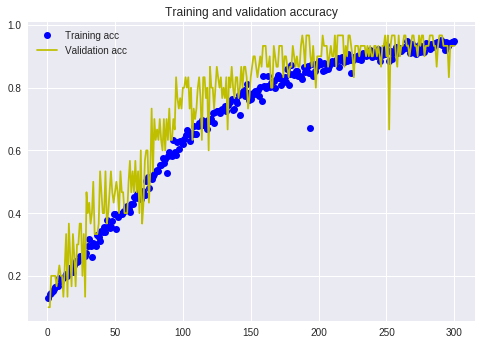

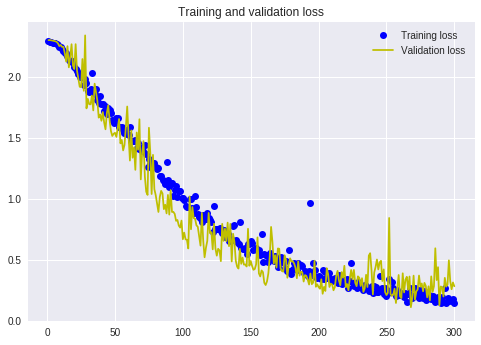

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import codecs
import json

model.save('./drive/data/vanilla_drop300_1.h5')
with codecs.open('./drive/data/vanilla300_1.json', 'w', 'utf-8') as f:
  json.dump(history.history, f, ensure_ascii=False)
  f.write('\n')

In [6]:
from keras.models import load_model

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  # This is the target directory
  './drive/data/FacePlace/AsianSample/train',
  target_size=(125, 125),
  batch_size=32,
  # Since we use binary_crossentropy loss, we need binary labels
  class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
  './drive/data/FacePlace/AsianSample/val',
  target_size=(125, 125),
  batch_size=32,
  class_mode='categorical')

model = load_model('./drive/data/vanilla_drop300_1.h5')

Found 236 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [0]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=50,
  epochs=300,
  validation_data=validation_generator,
  validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch 1/300
50/50 [==============================] - 144s 3s/step - loss: 0.1778 - acc: 0.9404 - val_loss: 0.3621 - val_acc: 0.9000
Epoch 2/300
50/50 [==============================] - 23s 462ms/step - loss: 0.3735 - acc: 0.9032 - val_loss: 0.2284 - val_acc: 0.9667
Epoch 3/300
50/50 [==============================] - 23s 465ms/step - loss: 0.1487 - acc: 0.9506 - val_loss: 0.1556 - val_acc: 0.9333
Epoch 4/300
50/50 [==============================] - 25s 501ms/step - loss: 0.1062 - acc: 0.9627 - val_loss: 0.2511 - val_acc: 0.9333
Epoch 5/300
50/50 [==============================] - 23s 469ms/step - loss: 0.1635 - acc: 0.9475 - val_loss: 0.3202 - val_acc: 0.9333
Epoch 6/300
13/50 [======>.......................] - ETA: 8s - loss: 0.1531 - acc: 0.9463

50/50 [==============================] - 24s 477ms/step - loss: 0.1655 - acc: 0.9406 - val_loss: 0.2498 - val_acc: 0.9333
Epoch 7/300
50/50 [==============================] - 23s 461ms/step - loss: 0.1792 - acc: 0.9379 - val_loss: 0.3833 - val_acc: 0.9000
Epoch 8/300
50/50 [==============================] - 24s 474ms/step - loss: 0.1974 - acc: 0.9321 - val_loss: 0.1951 - val_acc: 0.9333
Epoch 9/300
50/50 [==============================] - 24s 477ms/step - loss: 0.1656 - acc: 0.9436 - val_loss: 0.1728 - val_acc: 0.9333
Epoch 10/300
50/50 [==============================] - 23s 457ms/step - loss: 0.1499 - acc: 0.9448 - val_loss: 0.2272 - val_acc: 0.9333
Epoch 11/300
17/50 [=========>....................] - ETA: 9s - loss: 0.1183 - acc: 0.9547

50/50 [==============================] - 24s 483ms/step - loss: 0.1648 - acc: 0.9421 - val_loss: 0.2727 - val_acc: 0.9667
Epoch 12/300
50/50 [==============================] - 25s 492ms/step - loss: 0.1451 - acc: 0.9522 - val_loss: 0.2528 - val_acc: 0.9667
Epoch 13/300
50/50 [==============================] - 24s 475ms/step - loss: 0.1852 - acc: 0.9398 - val_loss: 0.2194 - val_acc: 0.9667
Epoch 14/300
50/50 [==============================] - 24s 478ms/step - loss: 0.1692 - acc: 0.9444 - val_loss: 0.2058 - val_acc: 0.9333
Epoch 15/300
50/50 [==============================] - 23s 463ms/step - loss: 0.1265 - acc: 0.9556 - val_loss: 0.2695 - val_acc: 0.9333
Epoch 16/300
18/50 [=========>....................] - ETA: 8s - loss: 0.1283 - acc: 0.9595

50/50 [==============================] - 24s 482ms/step - loss: 0.1255 - acc: 0.9615 - val_loss: 0.3317 - val_acc: 0.9333
Epoch 17/300
50/50 [==============================] - 24s 472ms/step - loss: 0.1697 - acc: 0.9415 - val_loss: 0.2206 - val_acc: 0.9000
Epoch 18/300
50/50 [==============================] - 23s 461ms/step - loss: 0.1037 - acc: 0.9649 - val_loss: 0.1909 - val_acc: 0.9667
Epoch 19/300
50/50 [==============================] - 24s 479ms/step - loss: 0.1309 - acc: 0.9566 - val_loss: 0.2644 - val_acc: 0.9333
Epoch 20/300
50/50 [==============================] - 24s 483ms/step - loss: 0.1070 - acc: 0.9604 - val_loss: 0.2757 - val_acc: 0.9667
Epoch 21/300
17/50 [=========>....................] - ETA: 8s - loss: 0.0940 - acc: 0.9688

50/50 [==============================] - 24s 485ms/step - loss: 0.1575 - acc: 0.9520 - val_loss: 0.2307 - val_acc: 0.9667
Epoch 22/300
50/50 [==============================] - 23s 470ms/step - loss: 0.1078 - acc: 0.9618 - val_loss: 0.1473 - val_acc: 0.9667
Epoch 23/300
50/50 [==============================] - 24s 472ms/step - loss: 0.1459 - acc: 0.9489 - val_loss: 0.2183 - val_acc: 0.9000
Epoch 24/300
49/50 [============================>.] - ETA: 0s - loss: 0.1510 - acc: 0.9466

In [0]:
model.save('./drive/data/vanilla_drop300_2.h5')
with open('./drive/data/vanilla300.txt') as f:
  f.write(history.history)